In [3]:
import datetime as dt
import pandas as pd
from fastquant import get_crypto_data
from matplotlib import dates as mdates
from matplotlib import pyplot as plt
from matplotlib import ticker as mticker
from mplfinance.original_flavor import candlestick_ohlc

In [4]:
crypto = "BTC"
prev_year = dt.date.today() - pd.offsets.DateOffset(years=1)
today = dt.date.today()

In [6]:
df = get_crypto_data(f"{crypto}/USDT", str(prev_year.date()), str(today))

In [8]:
data = df.copy()
data = data.reset_index()
data.rename(columns={"dt":"Date"}, inplace=True)
data["Date"] = pd.to_datetime(data.Date)
data["Date"] = mdates.date2num(data["Date"].values)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


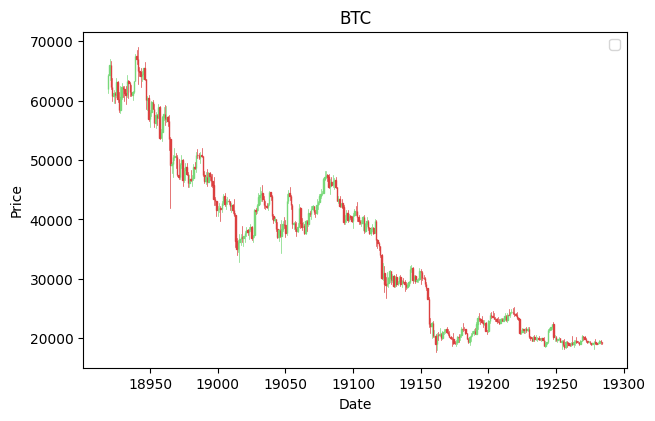

In [9]:
fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

candlestick_ohlc(ax1, data.values, width=0.4, colorup="#77d879", colordown="#db3f3f")

plt.xlabel('Date')
plt.ylabel('Price')
plt.title(crypto)
plt.legend()
plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
plt.show()